# KNN Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('KNN_Project_Data')

In [3]:
df.shape

(1000, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [5]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


In [6]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [7]:
X=df.drop('TARGET CLASS',axis=1)
Y=df['TARGET CLASS']

###  StandardScaler

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler=StandardScaler()

In [10]:
scaler.fit(X)
X=scaler.transform(X)

### Test Train Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=.25,random_state=10)

###  KNN without k value

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn=KNeighborsClassifier()

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [16]:
y_pred=knn.predict(X_test)

### Prediction and evaluation

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

In [18]:
f1_score(y_test,y_pred)

0.7768595041322314

In [19]:
print(f'{classification_report(y_test,y_pred)}')

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       138
           1       0.72      0.84      0.78       112

    accuracy                           0.78       250
   macro avg       0.79      0.79      0.78       250
weighted avg       0.79      0.78      0.78       250



### KNN with K value

In [20]:
error_rate=[]

for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))
    

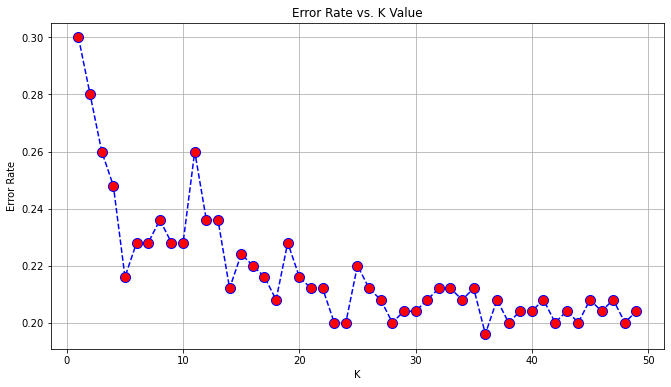

In [21]:
plt.figure(figsize=(11,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()
plt.show()

In [22]:
np.argmin(error_rate)

35

In [23]:
error_rate[35]

0.196

### Final Train

In [24]:
knn=KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)


In [25]:
f1_score(y_test,y_pred)

0.7818930041152264

In [26]:
print(f'{classification_report(y_test,y_pred)}')

              precision    recall  f1-score   support

           0       0.86      0.74      0.79       138
           1       0.73      0.85      0.78       112

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.80      0.79      0.79       250

